In [44]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [45]:
x, y = mnist["data"], mnist["target"]


In [46]:
x.shape

(70000, 784)

In [47]:
y.shape

(70000,)

In [48]:
type(x.values)

numpy.ndarray

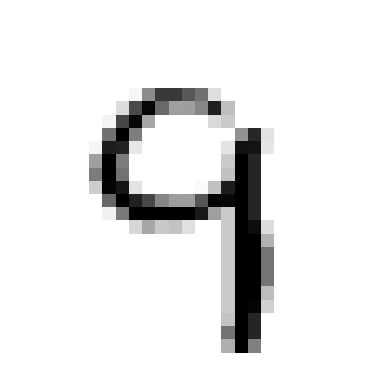

9


In [49]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = x.values[39000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

print(y.values[36000])

In [50]:
x, y = x.values, y.values

In [51]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [52]:
print(y_train)

['5', '0', '4', '1', '9', ..., '8', '3', '5', '6', '8']
Length: 60000
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [53]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Training a 5-detector(binary classifier)

In [54]:
y_train_5 = (y_train == '5') # The classes are as strings not integers.
y_test_5 = (y_test=='5')

In [55]:
np.unique(y_train_5)

array([False,  True])

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [57]:
sgd_clf.predict([some_digit])

array([False])

In [58]:
# Implementing Cross-Validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    x_test_fold = x_train[test_index]
    y_test_fold = (y_train_5[test_index])
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96895
0.94745
0.91365


In [59]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.92485, 0.95905, 0.96395])

In [60]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, x, y=None):
        pass
    def predict(self, x):
        return np.zeros((len(x), 1), dtype=bool)

In [61]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.9099 , 0.9094 , 0.90965])

In [62]:
# Confusion Matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [63]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52787,  1792],
       [ 1251,  4170]], dtype=int64)

In [64]:
# Precision and Recall

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)
print(precision, recall)

0.699429721569943 0.7692307692307693


Precision answers off all the predicted positive, how much are actually positive.
Precision = TP/(TP + FP)

Recall answers of all the positives, how much are predicted positive.
Recall = TP/(TP + FN)

F-1 score is the harmonic mean of precision and recall

In [65]:
print(2*(precision * recall) / (precision + recall))

0.7326715277167706


In [66]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7326715277167706

In [67]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-1903.65959721])

In [68]:
threshold = 0 # assuming some value
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [69]:
threshold = 20000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [70]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method='decision_function')

In [71]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [72]:
print(precisions.shape)
print(recalls.shape)
print(thresholds.shape)

(59976,)
(59976,)
(59975,)


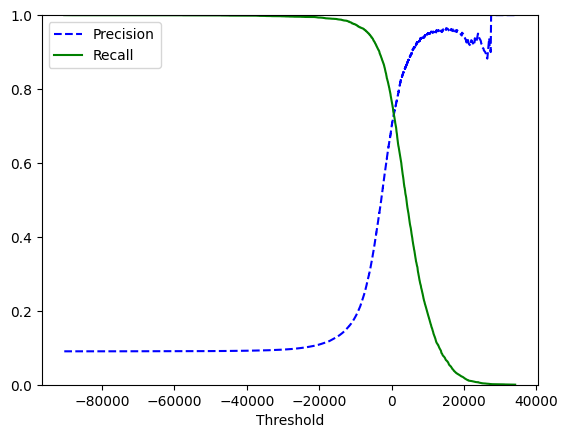

In [73]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [74]:
y_train_pred_90 = (y_scores > 100)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.7049906319196049
0.7635122671093895


ROC curve plots the true positive rate(recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. FPR = 1 - TNR(specificity). Area under the curve near to 1 is good for a classifier. It's like plotting precision versus recall.

In [75]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [76]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

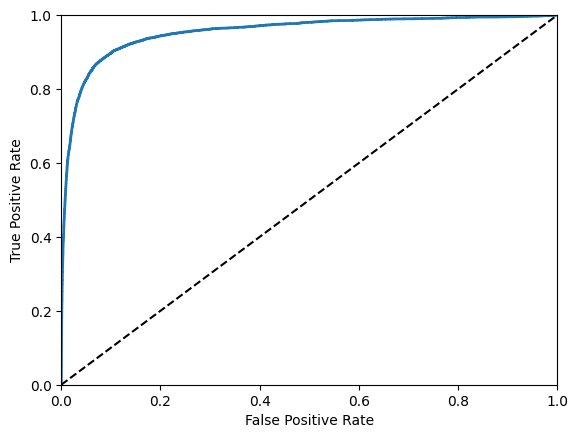

In [77]:
plot_roc_curve(fpr, tpr)
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5, y_scores))

0.9543761952076162


In [79]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method='predict_proba')

In [80]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

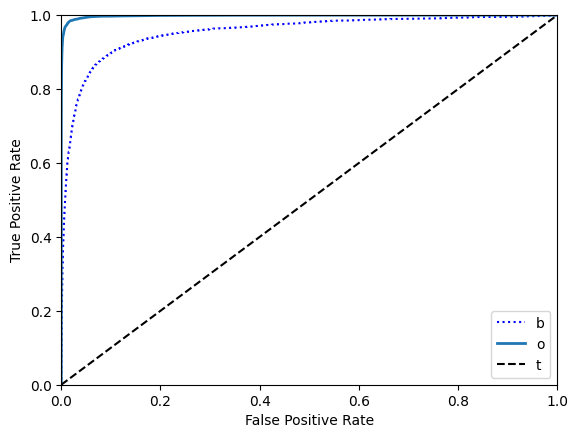

In [81]:
plt.plot(fpr, tpr, 'b:', label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend('bottom right')
plt.show()

In [82]:
print(roc_auc_score(y_train_5, y_scores_forest))

0.9984133094861903


## MultiClass Classification

One-versus-all (OvA) strategy is a way to perform multiclass classification using multiple binary classifiers. We can train a binary classifier for every class and get the decision score from each classifier and select the one which has the maxmium score.

One-versus-one (OvO) strategy is another way by training a binary classifier for every pair of digits: one to distinguish 0s and 1s, 0s and 2s, 0s and 3s and so on. If there are N classes, N * (N - 1) / 2 clssifiers needs to get trained. The class with more win is the digit. 

In [83]:
sgd_clf.fit(x_train, y_train) 
sgd_clf.predict([some_digit])

array(['9'], dtype='<U1')

y_train has total of 10 classes. Scikit-learn automatically detects trying to use binary classification for a multi-class classification task. It runs OvA except for SVM classifiers for which it uses OvO.

In [84]:
some_digit_scores = sgd_clf.decision_function([some_digit])
print(some_digit_scores)

[[-25141.33411768 -38646.99567969 -10529.99254137  -1209.00130546
   -1013.89375936  -5329.63189815 -11737.67901909  -8767.2870137
   -3442.80302213    568.46855504]]


In [85]:
np.argmax(some_digit_scores)

9

In [86]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [87]:
sgd_clf.classes_[np.argmax(some_digit_scores)]

'9'

Using OvO strategy in SGDClassifier

In [88]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([some_digit])

array(['9'], dtype=object)

In [89]:
# Training RandomForestClassifier

forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

array(['9'], dtype=object)

In [90]:
forest_clf.predict_proba([some_digit])i

array([[0.  , 0.  , 0.  , 0.02, 0.05, 0.  , 0.  , 0.  , 0.  , 0.93]])

In [91]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.8383, 0.8833, 0.87  ])

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.89665, 0.8974 , 0.90375])

In [93]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5589,    0,   15,    5,    9,   37,   34,    4,  229,    1],
       [   0, 6409,   44,   22,    3,   43,    6,    9,  195,   11],
       [  22,   25, 5240,   86,   76,   25,   68,   34,  376,    6],
       [  26,   22,  108, 5231,    1,  200,   24,   41,  411,   67],
       [  10,   12,   39,   11, 5244,    7,   32,   17,  308,  162],
       [  30,   16,   23,  157,   51, 4449,   80,   14,  538,   63],
       [  24,   18,   44,    1,   45,   86, 5553,    5,  142,    0],
       [  20,   14,   50,   24,   56,   11,    5, 5684,  201,  200],
       [  16,   60,   40,   86,    3,  113,   30,    7, 5453,   43],
       [  22,   21,   31,   58,  135,   34,    1,  171,  372, 5104]],
      dtype=int64)

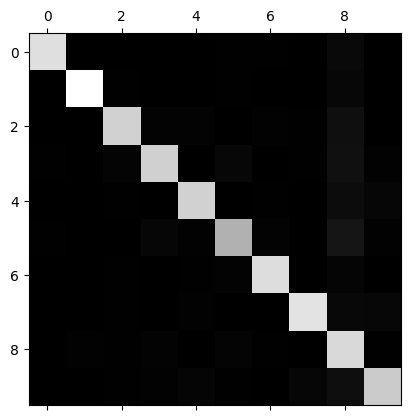

In [94]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [96]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

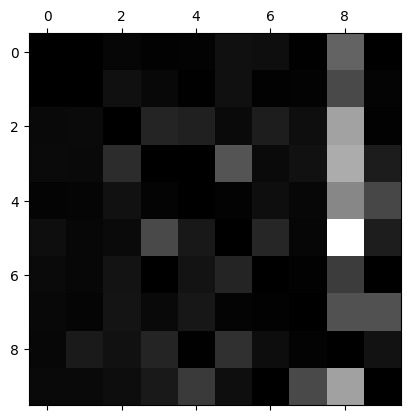

In [99]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [103]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

D:\ML\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  
D:\ML\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until
D:\ML\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.
D:\ML\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """


ZeroDivisionError: integer division or modulo by zero

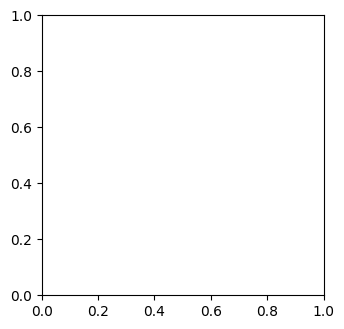

In [104]:
cl_a, cl_b = 3, 5
x_aa = x_train[(y_train == cl_a) & (y_train_pred == cl_a)]
x_ab = x_train[(y_train == cl_a) & (y_train_pred == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_train_pred == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits(x_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(x_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(x_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(x_bb[:25], images_per_row=5)
plt.show()

## Multilabel Classification

Multi-label classification assigns multiple labels to each instance. For instance, a photo can be labeled with "cat" and "dog." It's useful in tasks like tagging images, predicting topics in text, or diagnosing multiple diseases.

In [109]:
from sklearn.neighbors import KNeighborsClassifier


y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

AttributeError: 'Categorical' object has no attribute 'values'

## Multioutput Classification


Multioutput classification deals with predicting multiple output values for each instance. It's like solving multiple related tasks simultaneously. For example, predicting both the color and shape of an object in an image.

# Exercises

1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

k_clf = KNeighborsClassifier()
param_grid = [{'weights': ['uniform', 'distance'], 'n_neighbors':[3, 4, 5]}]
grid_search= GridSearchCV(k_clf, param_grid, cv=5, verbose=3)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  16.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  14.1s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  13.7s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  14.4s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  18.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  15.6s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  15.1s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  15.3s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  14.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=  13.9s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.970 total time=  16.5s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [114]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [115]:
grid_search.best_score_

0.97345

In [116]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(x_test)
accuracy_score(y_test, y_pred)

0.9714

2. Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.


In [117]:
from scipy.ndimage.interpolation import shift

In [118]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dx, dy], cval=0, mode='constant')
    return shifted_image.reshape([-1])

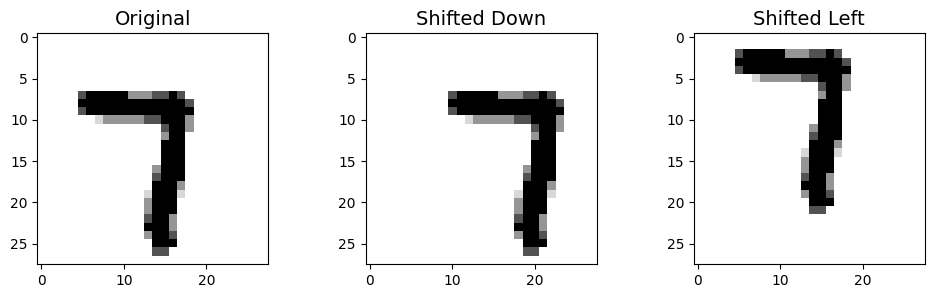

In [119]:
image = x_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation='nearest', cmap="Greys")
plt.subplot(132)
plt.title("Shifted Down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted Left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [120]:
x_train_augmented = [image for image in x_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(x_train, y_train):
        x_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)
        
x_train_augmented = np.array(x_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [123]:
shuffle_idx = np.random.permutation(len(x_train_augmented))
x_train_augmented = x_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [124]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [125]:
knn_clf.fit(x_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [126]:
y_pred = knn_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9763